In [1]:
import numpy as np
from matplotlib import pyplot as plt
from kalman_classes import *
from kalman_helpers import *

$$
\mathbf{x}(t) = \begin{bmatrix} x(t) \\ y(t) \\ z(t) \\ \dot{x}(t) \\ \dot{y}(t) \\ \dot{z}(t) \end{bmatrix}
= \begin{bmatrix}
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}
B  = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\frac{1}{m} & 0 & 0 \\
0 & \frac{1}{m} & 0 \\
0 & 0 & \frac{1}{m}
\end{bmatrix}
$$


$$

A = \begin{bmatrix}
1 & 0 & 0 & dt & 0 & 0 \\
0 & 1 & 0 & 0 & dt & 0 \\
0 & 0 & 1 & 0 & 0 & dt \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}

B = \begin{bmatrix}
\frac{dt^2}{2m} & 0 & 0 \\
0 & \frac{dt^2}{2m} & 0 \\
0 & 0 & \frac{dt^2}{2m} \\
\frac{dt}{m} & 0 & 0 \\
0 & \frac{dt}{m} & 0 \\
0 & 0 & \frac{dt}{m} \\
\end{bmatrix}
$$

$$C1 = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
\end{bmatrix}
C2 = \begin{bmatrix}
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

Define process noise covariance matrix R as a 6x6 identitfy matrix times 0.0001 m (.1 mm).

In [2]:
R = 0.0001 * np.eye(6) # n x n, 6x6

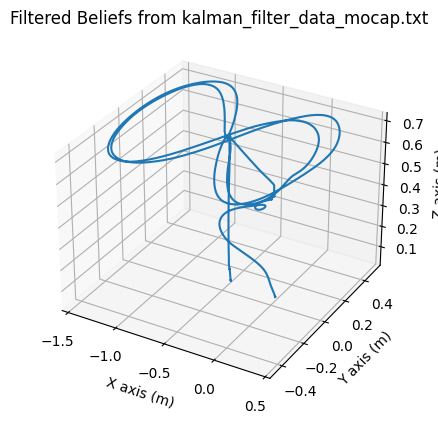

In [3]:
mocapData = Data('kalman_filter_data_mocap.txt')
Q = 0.01 * np.eye(3) # k x k, 3x3
kalmanMocap = Kalman(mocapData, R, Q)
kalmanMocap.execute()
kalmanMocap.plot_state_3D()

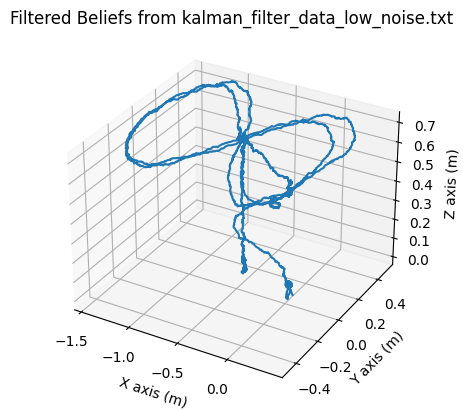

In [4]:
lowNoiseData = Data('kalman_filter_data_low_noise.txt')
Q =  0.1 * np.eye(3) # k x k, 3x3
kalmanLow = Kalman(lowNoiseData, R, Q)
kalmanLow.execute()
kalmanLow.plot_state_3D()

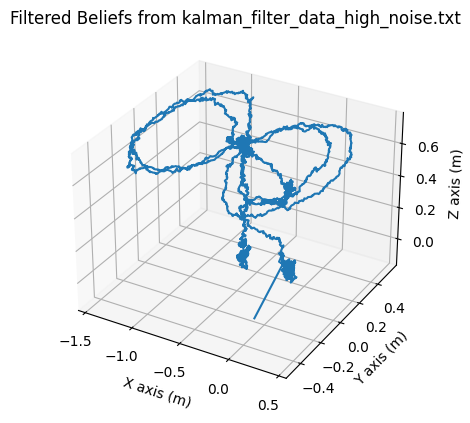

In [5]:
highNoiseData = Data('kalman_filter_data_high_noise.txt')
Q =  0.5 * np.eye(3) # k x k, 3x3
kalmanHigh = Kalman(highNoiseData, R, Q)
kalmanHigh.execute()
kalmanHigh.plot_state_3D()

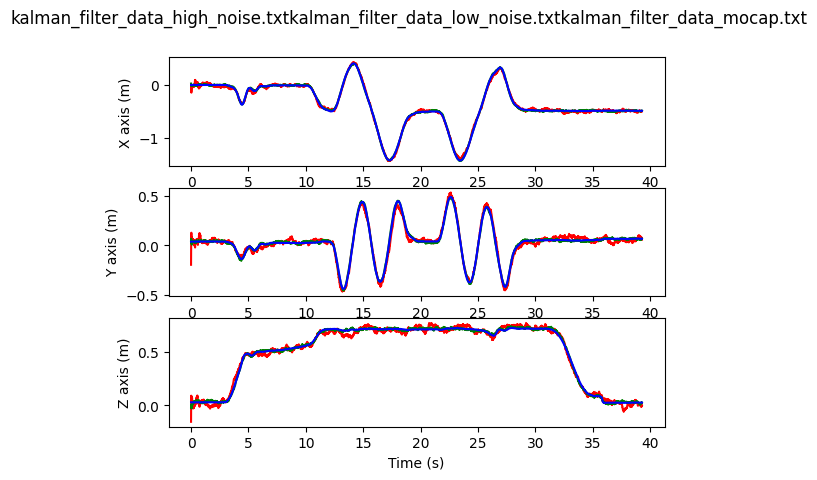

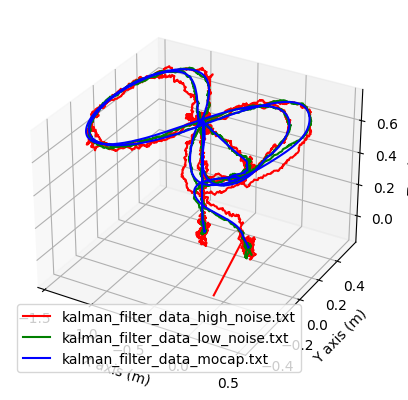

In [6]:
compare_tracks([kalmanMocap, kalmanLow, kalmanHigh])
compare_tracks_3D([kalmanMocap, kalmanLow, kalmanHigh])

Another way to verify my Kalman filter on the noisy data is by comparing the position error between raw measurements and filtered states. The errors will be computed against the filtered motion capture data.

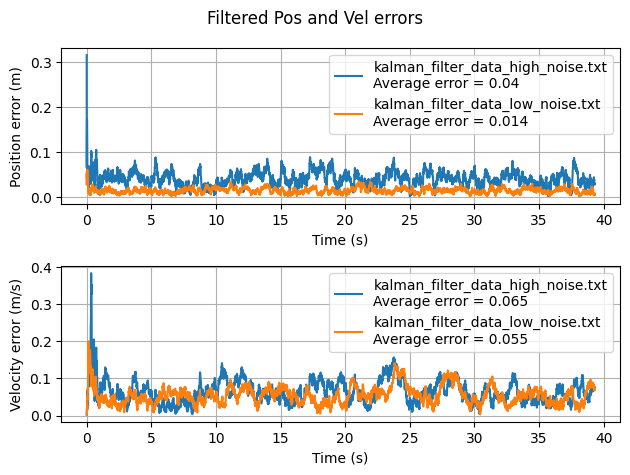

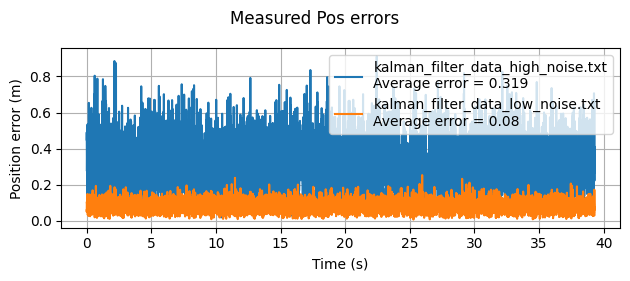

In [7]:
plot_error(kalmanMocap, [kalmanLow, kalmanHigh])
plot_z_error(kalmanMocap, [kalmanLow, kalmanHigh])

Clearly from these plots, the Kalman filter greatly reduced the average position error from raw measurement to filtered state. In the low noise case, this error reduced from 0.08m to 0.014m. In the high noise case, this reduced from 0.319m to 0.04m. These are massive improvements in tracking accuracy and highlight the usefullness of the Kalman filter in this situation.